## المقدمة

في هذا البرنامج التعليمي ، نقدم لك ميزة البحث من خلال الألعاب في CSP. اخترنا Suduko لتمثيل حالة بسيطة من الألعاب التي تتطلب وكيلًا واحدًا لملء المربعات الفارغة على اللوحة. استخدمنا خوارزميات CSP وهي خوارزمية BackTracking () ، خوارزمية تناسق القوس () لحل اللعبة.

## 2. لعبة Sudoku

لغز مطبوع على شبكة مربعة من تسعة مربعات كبيرة كل منها مقسم إلى تسعة مربعات أصغر ، والهدف منها هو ملء كل مربع من المربعات الـ 81 بحيث يحتوي كل عمود وصف ومربع كبير على كل رقم من 1 إلى 9. و يحتوي كل صف وعمود على 9 مربعات ، يجب ألا يحتوي على نفس الرقم من 1 إلى 9. على سبيل المثال إذا كان الصف يحتوي على الرقم 2 لذلك يجب ألا تحتوي المربعات المتبقية في هذا الصف على نفس الرقم وهو 2.

**الشكل2** يشرح مجال المربعات الكبيرة والصغيرة

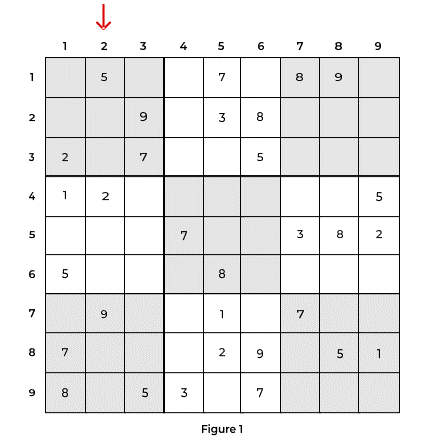
كما هو موضح في **الشكل 1** ، يجب ألا يتكرر الرقم 5 في الصف 1 والعمود 2 مرة أخرى في ثلاثة مجالات ، الصف 1 والعمود 2. أيضًا ، المجال المربع الكبير حيث تم وضع 5 عليه.

### صيغة Sudoku
**الحالة الأولية:** تبدأ اللعبة بأرقام عشوائية مملوءة في مربعات صغيرة عشوائية.

**الإجراءات:** يجب على اللاعب ملء الأرقام المفقودة (المربعات الفارغة) بالأرقام العشوائية المحددة.

**الولاية:** مجموعة من الحالات التي يمكن الوصول إليها من الحالة الأولية من خلال سلسلة من الإجراءات.

**دولة الهدف:** جميع المربعات الكبيرة والصغيرة تملأ بدون أي تعارض.

## 3. خوارزميات بحث CSP 

### 3.1 خوارزمية التراجع
**Backtracking** هي خوارزمية عامة لإيجاد جميع (أو بعض) الحلول لبعض المشكلات الحسابية ، والتي تبني بشكل تدريجي مرشحين للحلول ، وتتخلى عن كل مرشح جزئي ("backtracks") بمجرد أن تحدد أن المرشح لا يمكن أن يكون أن تكتمل إلى حل صالح.

#### مثال بسيط لتطبيق  `Backtracking ()` 'على المشكلة أعلاه:
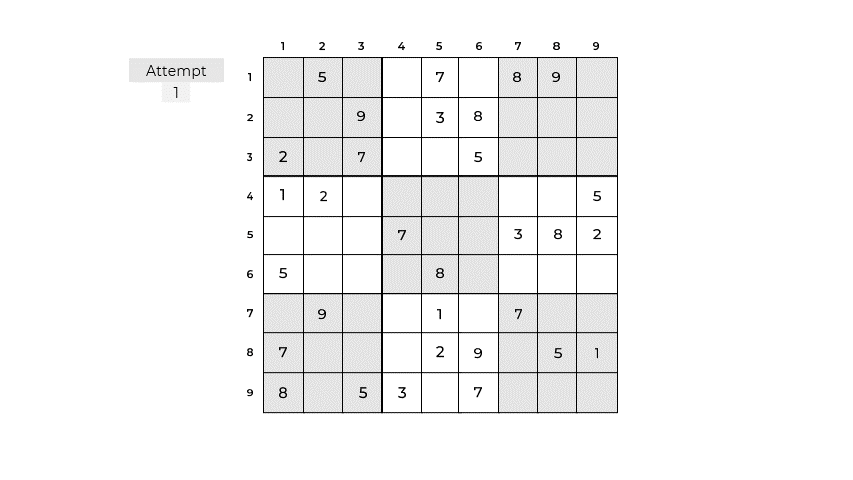

#### الشجرة ادناه تشرح  `()backtracking` :


**`وقت الاستيراد`:** لحساب الوقت لتنفيذ خوارزمية التراجع.

**`print_grid (arr)`:** وظيفة لطباعة شبكة الثقب (المصفوفة) قبل الحل وبعده

In [1]:
# importing time to calculate backtracking mplementation.
import time
 
# A Utility Function to print the Grid
def print_grid(arr):
    for i in range(9):
        for j in range(9):
            print(arr[i][j], end = " ")
        print ()

** `find_empty_location (arr، l)`: ** وظيفة لمعرفة ما إذا كان هناك مربع فارغ لتخزين موقعه في قائمة `l`. إذا تم العثور على مربع فارغ ، فارجع إلى `True` إذا لم يكن `False`

In [2]:
# Function to Find the entry in
# the Grid that is still  not used
# Searches the grid to find an
# entry that is still unassigned. If
# found, the reference parameters
# row, col will be set the location
# that is unassigned, and true is
# returned. If no unassigned entries
# remains, false is returned.
# 'l' is a list  variable that has
# been passed from the solve_sudoku function
# to keep track of incrementation
# of Rows and Columns
def find_empty_location(arr, l):
    for row in range(9):
        for col in range(9):
            if(arr[row][col]== 0):
                l[0]= row
                l[1]= col
                return True
    return False

تؤدي كل هذه الوظائف نفس الهدف وهو البحث إذا كان الرقم المخصص موجودًا بالفعل في الصف عن طريق وظيفة **`used_in_row (arr، row، num)`** ، في العمود بواسطة **`used_in_col (arr، col، num ) `** وفي المربع الكبير **` used_in_box (arr، row، col، num) `**

In [3]:
# Returns a boolean which indicates
# whether any assigned entry
# in the specified row matches
# the given number.
def used_in_row(arr, row, num):
    for i in range(9):
        if(arr[row][i] == num):
            return True
    return False
 
# Returns a boolean which indicates
# whether any assigned entry
# in the specified column matches
# the given number.
def used_in_col(arr, col, num):
    for i in range(9):
        if(arr[i][col] == num):
            return True
    return False
 
# Returns a boolean which indicates
# whether any assigned entry
# within the specified 3x3 box
# matches the given number
def used_in_box(arr, row, col, num):
    for i in range(3):
        for j in range(3):
            if(arr[i + row][j + col] == num):
                return True
    return False

**`check_location_is_safe (arr، row، col، num)`:** تقوم هذه الوظيفة بتنفيذ جميع الوظائف الثلاث السابقة. للتحقق مما إذا كان من المقبول تعيين رقم في مربع فارغ أم لا. إذا كان الأمر جيدًا ، فارجع إلى `True` إذا لم يكن `False`

In [4]:
# Checks whether it will be legal
# to assign num to the given row, col
# Returns a boolean which indicates
# whether it will be legal to assign
# num to the given row, col location.
def check_location_is_safe(arr, row, col, num):
     
    # Check if 'num' is not already
    # placed in current row,
    # current column and current 3x3 box
    return not used_in_row(arr, row, num) and not used_in_col(arr, col, num) and not used_in_box(arr, row - row % 3, col - col % 3, num)

**`solve_sudoku (arr)`:** تأخذ هذه الوظيفة صورة أو شبكة (لوحة) لم يتم حلها لحلها عن طريق تطبيق جميع الإجراءات النهائية السابقة. `check_location_is_safe (arr، row، col، num)`،` used_in_box (arr، row، col، num)`، `used_in_col (arr، col، num) `،` used_in_row (arr، row، num) `،` find_empty_location (arr، l) `

In [5]:
def solve_sudoku(arr):

    # 'l' is a list variable that keeps the
    # record of row and col in
    # find_empty_location Function   
    l =[0, 0]
     
    # If there is no unassigned
    # location, we are done   
    if(not find_empty_location(arr, l)):
        return True
     
    # Assigning list values to row and col
    # that we got from the above Function
    row = l[0]
    col = l[1]
     
    # consider digits 1 to 9
    for num in range(1, 10):
         
        # if looks promising
        if(check_location_is_safe(arr, row, col, num)):
             
            # make tentative assignment
            arr[row][col]= num
 
            # return, if success,
            # ya !
            if(solve_sudoku(arr)):
                return True
 
            # failure, unmake & try again
            arr[row][col] = 0
             
    # this triggers backtracking       
    return False

في هذا القسم من الكود ، توجد هنا قيم اللوحة من المشكلة أعلاه. **(يمكنك تغيير القيم لاختبار عينات أخرى)** **تلميح:** إذا كنت تريد تغيير القيم ، فقم بتنزيلها أولاً.

In [6]:
if __name__=="__main__":
     
    # creating a 2D array for the grid
    grid =[[0 for x in range(9)]for y in range(9)]
     
    # assigning values to the grid
    grid =[[0, 5, 0, 0, 7, 0, 8, 9, 0],
          [0, 0, 9, 0, 3, 8, 0, 0, 0],
          [2, 0, 7, 0, 0, 5, 0, 0, 0],
          [1, 2, 0, 0, 0, 0, 0, 0, 5],
          [0, 0, 0, 7, 0, 0, 3, 8, 2],
          [5, 0, 0, 0, 8, 0, 0, 0, 0],
          [0, 9, 0, 0, 1, 0, 7, 0, 0],
          [7, 0, 0, 0, 2, 9, 0, 5, 1],
          [8, 0, 5, 3, 0, 7, 0, 0, 0]]

In [7]:
    # if success print the grid
    print("\nBEFORE SOLVING:")
    print_grid(grid)
    print("\n")
    startTime = time.time()
    if(solve_sudoku(grid)):
        print("AFTER SOLVING:")
        print_grid(grid)
        endTime = time.time()
        print(f"\nBacktracking Time: {endTime - startTime} ms")
    else:
        print("No solution exists")


BEFORE SOLVING:
0 5 0 0 7 0 8 9 0 
0 0 9 0 3 8 0 0 0 
2 0 7 0 0 5 0 0 0 
1 2 0 0 0 0 0 0 5 
0 0 0 7 0 0 3 8 2 
5 0 0 0 8 0 0 0 0 
0 9 0 0 1 0 7 0 0 
7 0 0 0 2 9 0 5 1 
8 0 5 3 0 7 0 0 0 


AFTER SOLVING:
3 5 1 2 7 4 8 9 6 
6 4 9 1 3 8 5 2 7 
2 8 7 6 9 5 1 4 3 
1 2 8 4 6 3 9 7 5 
9 6 4 7 5 1 3 8 2 
5 7 3 9 8 2 6 1 4 
4 9 2 5 1 6 7 3 8 
7 3 6 8 2 9 4 5 1 
8 1 5 3 4 7 2 6 9 

Backtracking Time: 0.020946502685546875 ms


### 3.2 خوارزمية Forward Checking
**الفحص المسبق** هو أسهل طريقة لمنع التعارضات المستقبلية. بدلاً من أداء تناسق القوس للمتغيرات التي تم تكوينها ، فإنه يؤدي شكلاً مقيدًا من تناسق القوس إلى المتغيرات التي لم يتم إنشاء مثيل لها بعد. نتحدث عن تناسق القوس المقيد لأن الفحص الأمامي يتحقق فقط من القيود بين المتغير الحالي والمتغيرات المستقبلية. عند تعيين قيمة للمتغير الحالي ، فإن أي قيمة في مجال متغير "مستقبلي" تتعارض مع هذا التعيين يتم إزالتها (مؤقتًا) من النطاق

في `ForwardChecking()` مختلف لكل مربع مجال وهو **{1،2،3،4،5،6،7،8،9}**

#### مثال على تقليص النطاقات في ` forwardChecking () `أدناه:
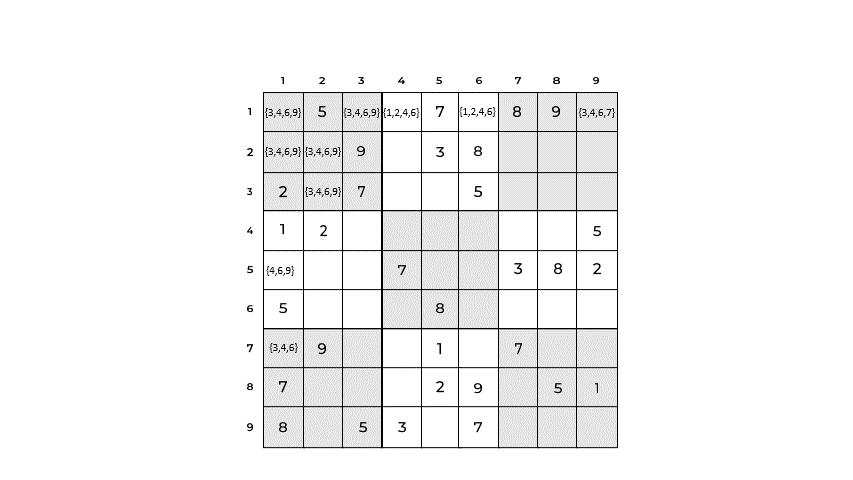

**`وقت الاستيراد`:** لحساب الوقت لتنفيذ خوارزمية التراجع.

**`من نسخة استيراد نسخة عميقة`:** قمنا باستيراد حزمة نسخ لنسخ الشبكة دون تغيير القيم الأصلية

In [ ]:
import time
from copy import deepcopy


grid =  [[0,5,0,0,7,0,8,9,0],
         [0,0,9,0,3,8,0,0,0],
         [2,0,7,0,0,5,0,0,0],
         [1,2,0,0,0,0,0,0,5],
         [0,0,0,7,0,0,3,8,2],
         [5,0,0,0,8,0,0,0,0],
         [0,9,0,0,1,0,7,0,0],
         [7,0,0,0,2,9,0,5,1],
         [8,0,5,3,0,7,0,0,0]]

**`print_grid (grid):`** تم إجراء هذه الوظيفة لطباعة الشبكة (اللوحة) بالكامل قبل الحل وبعده.

In [ ]:
def print_grid(grid):
    if not grid:
        print("No solution")
        return
    for i in range(9):
        for j in range(9):
            print(grid[i][j], end =" ")
        print()

**`read(grid)`:** ستقرأ هذه الوظيفة شبكة الفتحات ثم تحل محل جميع 0 (المربعات الفارغة) إلى مجالها ، على سبيل المثال. {1،2،3،4،5،6،7،8،9}

In [ ]:
# replace all squares which its value 0 by its domain {1,2,3,4,5,6,7,8,9} 
def read(grid):
    """ Read grid into state (replace 0 with set of possible values) """

    state = deepcopy(grid)
    for i in range(9):
        for j in range(9):
            cell = state[i][j]
            if cell == 0:
                state[i][j] = set(range(1,10))
    return state


# state means the 0's replaced by {1,2,34,5,6,7,8,9} the domain of each square
state = read(grid)

`done(state):` دالة للتحقق مما إذا كان هناك مربع به مجال بدلاً من القيم (مربعات فارغة) `return false`.

In [ ]:
# check if still the squares containt the domain sets return false.  
def done(state):
    """ Are we done? """

    for row in state:
        for cell in row:
            if isinstance(cell, set):
                return False
    return True

In [ ]:
def propagate_step(state):
    """
    Propagate one step.

    @return:  A two-tuple that says whether the configuration
              is solvable and whether the propagation changed
              the state.
    """

    new_units = False

    # propagate row rule
    for i in range(9):
        row = state[i]
        values = set([x for x in row if not isinstance(x, set)])
        for j in range(9):
            if isinstance(state[i][j], set):
                state[i][j] -= values
                if len(state[i][j]) == 1:
                    val = state[i][j].pop()
                    state[i][j] = val
                    values.add(val)
                    new_units = True
                elif len(state[i][j]) == 0:
                    return False, None

    # propagate column rule
    for j in range(9):
        column = [state[x][j] for x in range(9)]
        values = set([x for x in column if not isinstance(x, set)])
        for i in range(9):
            if isinstance(state[i][j], set):
                state[i][j] -= values
                if len(state[i][j]) == 1:
                    val = state[i][j].pop()
                    state[i][j] = val
                    values.add(val)
                    new_units = True
                elif len(state[i][j]) == 0:
                    return False, None

    # propagate cell rule
    for x in range(3):
        for y in range(3):
            values = set()
            for i in range(3 * x, 3 * x + 3):
                for j in range(3 * y, 3 * y + 3):
                    cell = state[i][j]
                    if not isinstance(cell, set):
                        values.add(cell)
            for i in range(3 * x, 3 * x + 3):
                for j in range(3 * y, 3 * y + 3):
                    if isinstance(state[i][j], set):
                        state[i][j] -= values
                        if len(state[i][j]) == 1:
                            val = state[i][j].pop()
                            state[i][j] = val
                            values.add(val)
                            new_units = True
                        elif len(state[i][j]) == 0:
                            return False, None

    return True, new_units

In [ ]:
def propagate(state):
    """ Propagate until we reach a fixpoint """
    while True:
        solvable, new_unit = propagate_step(state)
        if not solvable:
            return False
        if not new_unit:
            return True

In [ ]:
def solve(state):
    """ Solve sudoku """

    solvable = propagate(state)

    if not solvable:
        return None

    if done(state):
        return state

    for i in range(9):
        for j in range(9):
            cell = state[i][j]
            if isinstance(cell, set):
                for value in cell:
                    new_state = deepcopy(state)
                    new_state[i][j] = value
                    solved = solve(new_state)
                    if solved is not None:
                        return solved
                return None

هذا القسم من الكود الخاص بطباعة السبورة قبل وبعد حلها مع وقت التنفيذ

In [ ]:
print_grid(grid)
print()
startTime = time.time()
print_grid(solve(state))
endTime = time.time()
print(f"\nForward Checking Time:{endTime-startTime} ms")

### لذلك ، كما نرى هنا ، فإن خوارزمية `forwardChecking` أسرع قليلاً من خوارزمية `backtracking` في هذه المشكلة 

## 4. المراجع

1. [GeekForGeeks](https://www.geeksforgeeks.org/sudoku-backtracking-7/)

2. [Stackoverflow](https://stackoverflow.com/questions/1697334/algorithm-for-solving-sudoku/35500280)

3. [W3schools](https://www.w3schools.com/)